# Lesson 2 Assignment - Data Visualization Complementary Views 

## Author - Rodolfo Lerma



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g., small multiples) on both categorical and numeric variables.

A certain casino has contracted your team to determine if there are any patterns among their tables and patron attendance. They are not asking for prediction, just for a description of what is already there.

Now that we have studied different plot types and their usefulness in determining what is available in the data. Use the Jitter Head Count data set to find and report on interesting relationships in the data.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

## First look at the data

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)
headcount_df.dtypes

GameCode        object
DateFormat      object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64
dtype: object

In [3]:
#Check the shape of the data array
headcount_df.shape

(175677, 9)

**Summary:**
- The data set contains 175,677 rows.
- The data set has 9 variables (columns).
- 7 of the 9 columns are numeric (int64) and 2 are considered No Numeric (string and date)

In [4]:
headcount_df.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


## Examine the data frame

In [5]:
headcount_df.head()

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
0,BA,9/16/2011,6,0,0,1,0,6,47
1,BA,9/16/2011,7,0,0,1,0,6,47
2,BA,9/16/2011,8,0,0,1,0,6,47
3,BA,9/16/2011,9,0,0,1,0,6,47
4,BA,9/16/2011,10,0,1,0,0,6,47


In [6]:
headcount_df.tail()

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
175672,WR,10/31/2011,19,0,0,1,0,2,92
175673,WR,10/31/2011,20,1,1,0,1,2,92
175674,WR,10/31/2011,21,0,1,0,0,2,92
175675,WR,10/31/2011,22,1,1,0,1,2,92
175676,WR,10/31/2011,23,0,1,0,0,2,92


In [7]:
#Transform the variable DateFormat into DateTime variable
headcount_df.loc[:, 'DateFormat'] = pd.to_datetime(headcount_df.loc[:, 'DateFormat'])
headcount_df.set_index('DateFormat', inplace = True)

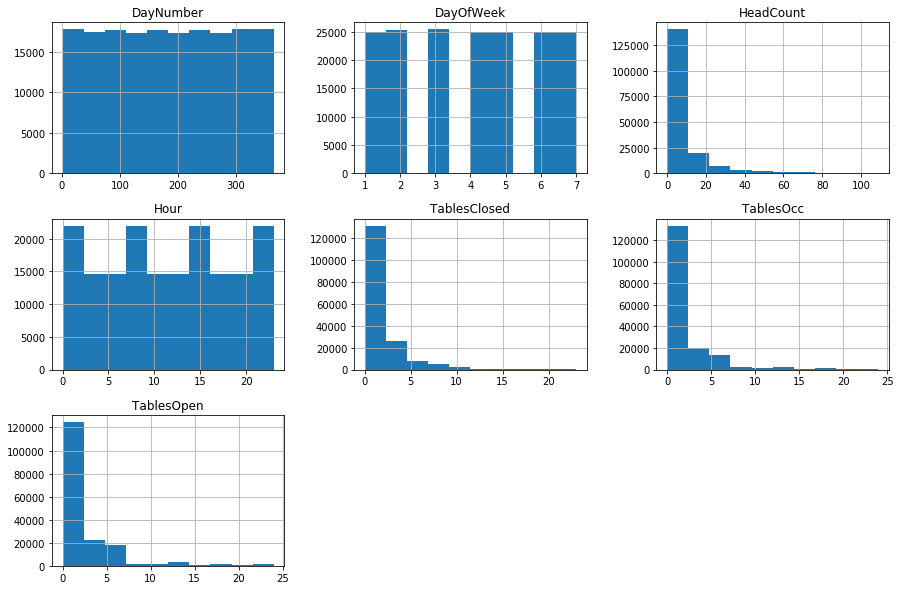

In [11]:
headcount_df.hist(figsize = (15,10))
plt.show()

## Correlation

In this part of the analysis a quick correlation analysis is provided to spot any correlated values that might lead to useful conclusions.

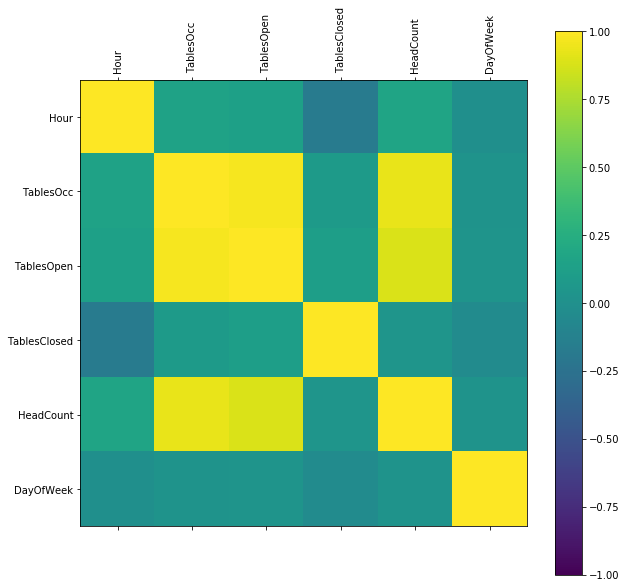

In [8]:
cols = ['Hour','TablesOcc','TablesOpen','TablesClosed','HeadCount','DayOfWeek']
correlations = headcount_df[cols].corr()
# plot correlation matrix
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols,rotation = 90)
ax.set_yticklabels(cols)
plt.show()

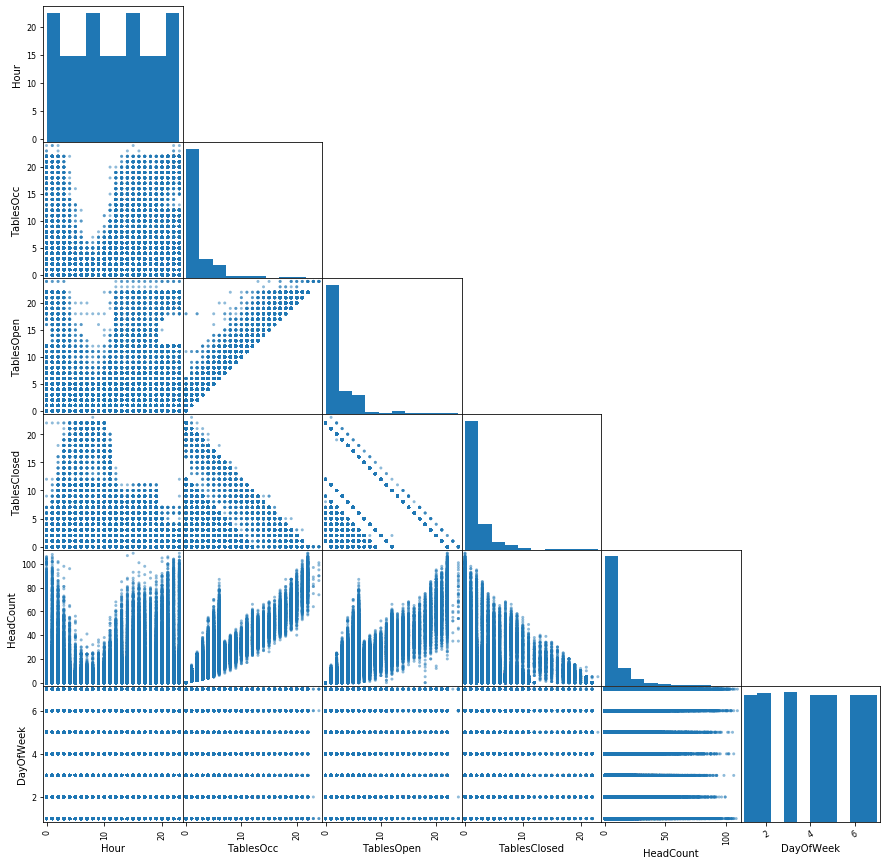

In [10]:
axes = scatter_matrix(headcount_df[cols], figsize = (15,15),diagonal='hist', alpha=0.5)

for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)
            
plt.xticks(rotation=30)
plt.yticks(rotation=45)
plt.show()

From here it is possible to see that each game has the same numbers except for BA & MS

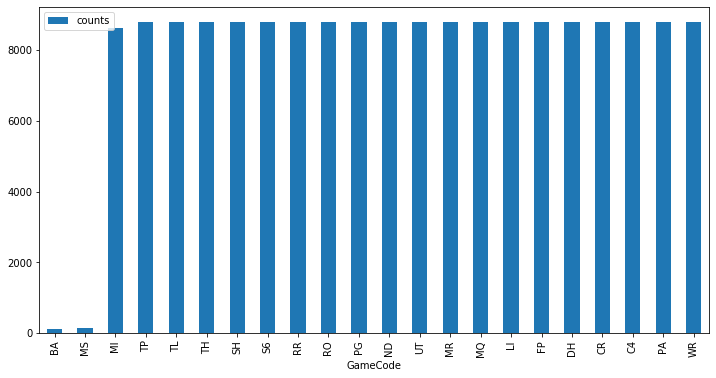

In [13]:
headcount_df.loc[:, ['GameCode', 'counts']].groupby(['GameCode']).agg('count').sort_values('counts').plot.bar(figsize=(12,6))

Pretty much what we have is an assemble of multiple tables where Game Code was the Group Factor

## Looking into some multiple variables

### Tables Time Series

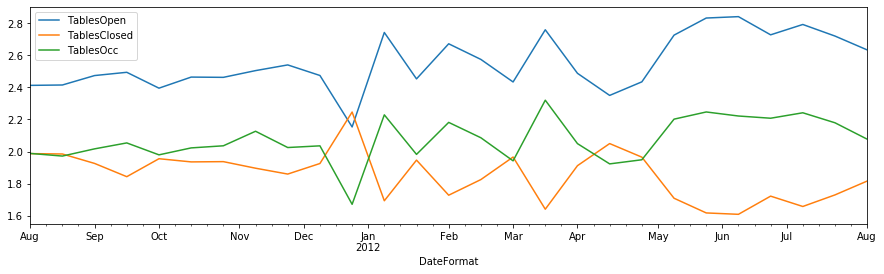

In [162]:
headcount_df[["TablesOpen", "TablesClosed", "TablesOcc"]].resample("2W").mean().plot(figsize=(15,4))

### HeadCount Vs Hour (Hue GameCode)

Text(0.5, 1, 'HeadCount vs. Hour \n with GameCode by Color')

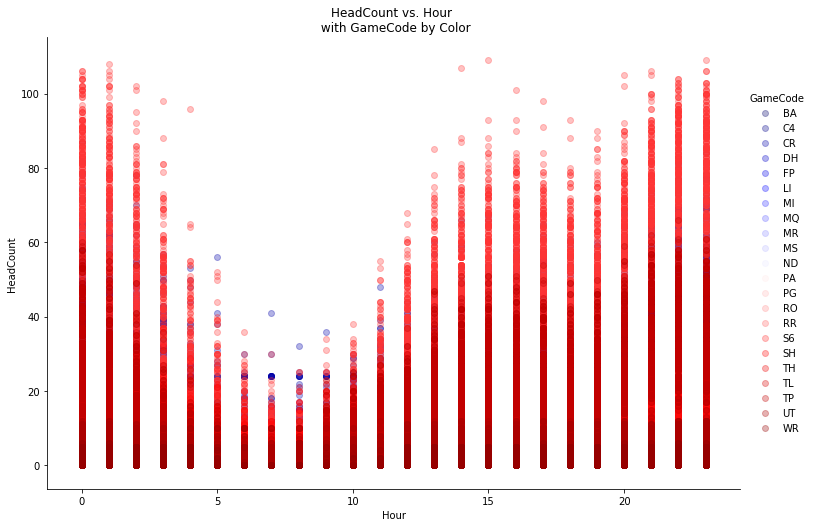

In [164]:
sns.lmplot(x = 'Hour', y = 'HeadCount', 
           data = headcount_df, 
           hue = "GameCode", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},height=7, aspect=1.5,
           fit_reg = False)
plt.xlabel('Hour')
plt.ylabel('HeadCount')
plt.title('HeadCount vs. Hour \n with GameCode by Color')

In [168]:
#New variable was created: Hour Bin (24/6 bins)
headcount_df.loc[:, 'hour_bin'] = pd.cut(headcount_df.loc[:, 'Hour'], bins = 6, labels = range(6))

### HeadCount Vs GameCode (Hue: Hour Bin)

Text(0.5, 1, 'HeadCount vs. Hour \n with GameCode by Color')

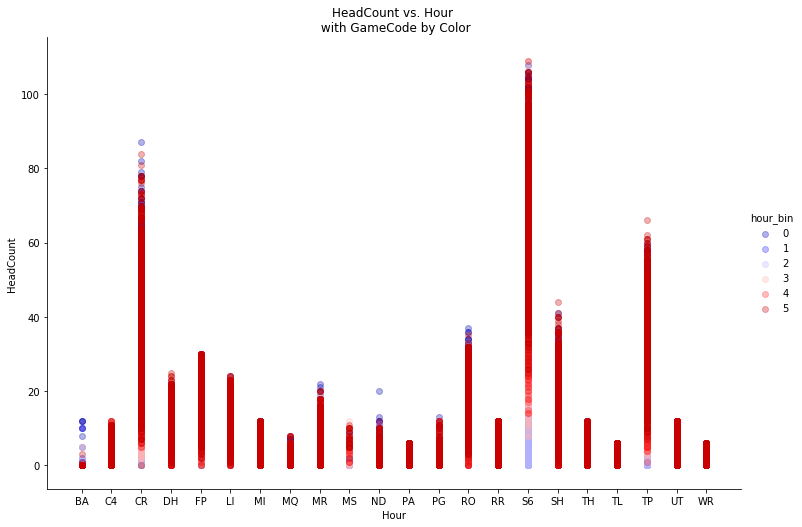

In [165]:
sns.lmplot(x = 'GameCode', y = 'HeadCount', 
           data = headcount_df, 
           hue = "hour_bin", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           height=7, aspect=1.5,
           fit_reg = False)
plt.xlabel('Hour')
plt.ylabel('HeadCount')
plt.title('HeadCount vs. Hour \n with GameCode by Color')

HeadCount of each GameCode (Bar Plot) group headCount by Gamecode and summ all values

Text(0.5, 1.0, 'Day of Week by Game')

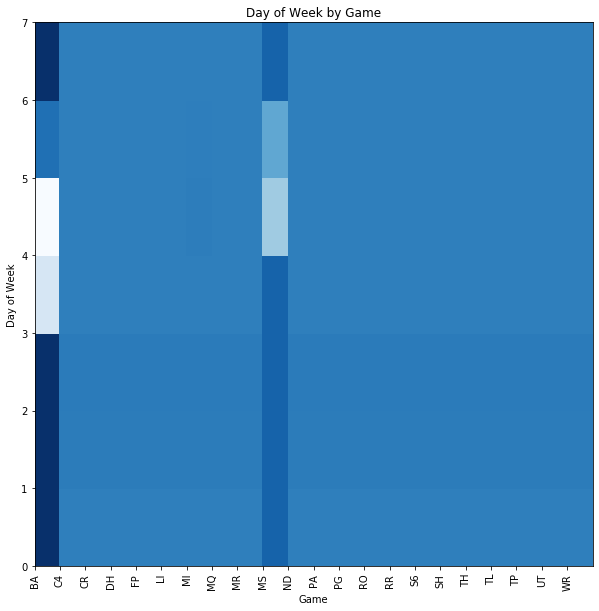

In [54]:
make_price = pd.crosstab(headcount_df.loc[:, 'DayOfWeek'], headcount_df.loc[:, 'GameCode'])
num_cars = make_price.apply(sum, axis = 0)
make_price = make_price.div(num_cars, axis = 1)

ax = plt.figure(figsize=(10, 10)).gca() # define axis
ax.pcolor(make_price, cmap = 'Blues')
ax.set_xticks(range(make_price.shape[1]))
ax.set_xticklabels(make_price.columns, rotation=90)
ax.set_xlabel('Game')
ax.set_ylabel('Day of Week')
ax.set_title('Day of Week by Game')

Text(0.5, 0, 'Hour')

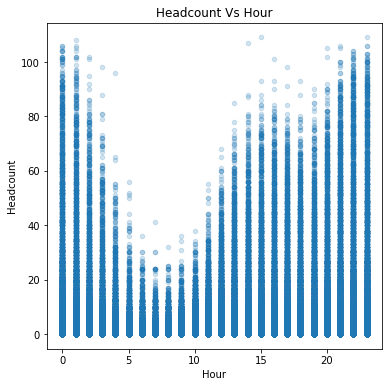

In [25]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
headcount_df.plot.scatter(x = 'Hour', y = 'HeadCount', ax = ax, alpha = 0.2)
ax.set_title('Headcount Vs Hour') # Give the plot a main title
ax.set_ylabel('Headcount')# Set text for y axis
ax.set_xlabel('Hour')

Text(0.5, 0, 'Hour')

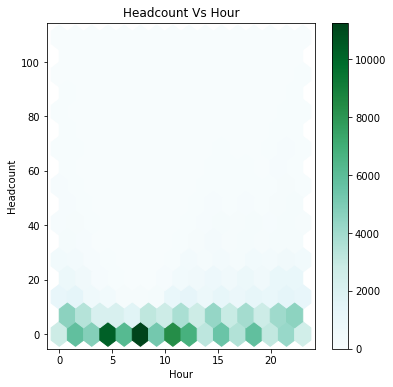

In [26]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
headcount_df.plot.hexbin(x = 'Hour', y = 'HeadCount', gridsize = 15, ax = ax)
ax.set_title('Headcount Vs Hour') # Give the plot a main title
ax.set_ylabel('Headcount')# Set text for y axis
ax.set_xlabel('Hour')

Text(0.5, 0, 'Day Of the Week')

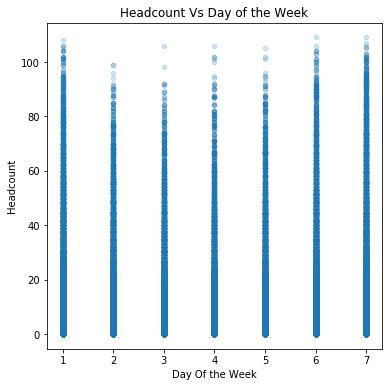

In [45]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
headcount_df.plot.scatter(x = 'DayOfWeek', y = 'HeadCount', ax = ax, alpha = 0.2)
ax.set_title('Headcount Vs Day of the Week') # Give the plot a main title
ax.set_ylabel('Headcount')# Set text for y axis
ax.set_xlabel('Day Of the Week')

Text(0.5, 0, 'Day of the Week')

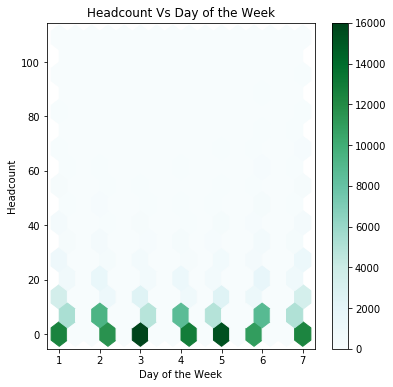

In [46]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
headcount_df.plot.hexbin(x = 'DayOfWeek', y = 'HeadCount', gridsize = 15, ax = ax)
ax.set_title('Headcount Vs Day of the Week') # Give the plot a main title
ax.set_ylabel('Headcount')# Set text for y axis
ax.set_xlabel('Day of the Week')

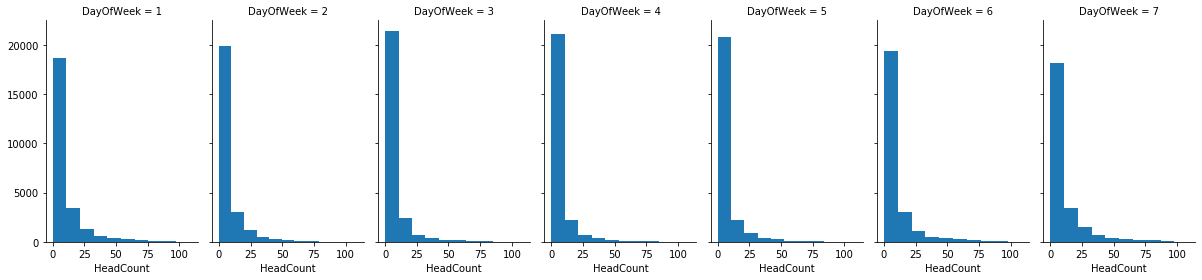

In [47]:
gr = sns.FacetGrid(headcount_df, col="DayOfWeek", height=4, aspect=0.6)
gr = gr.map(plt.hist, "HeadCount")

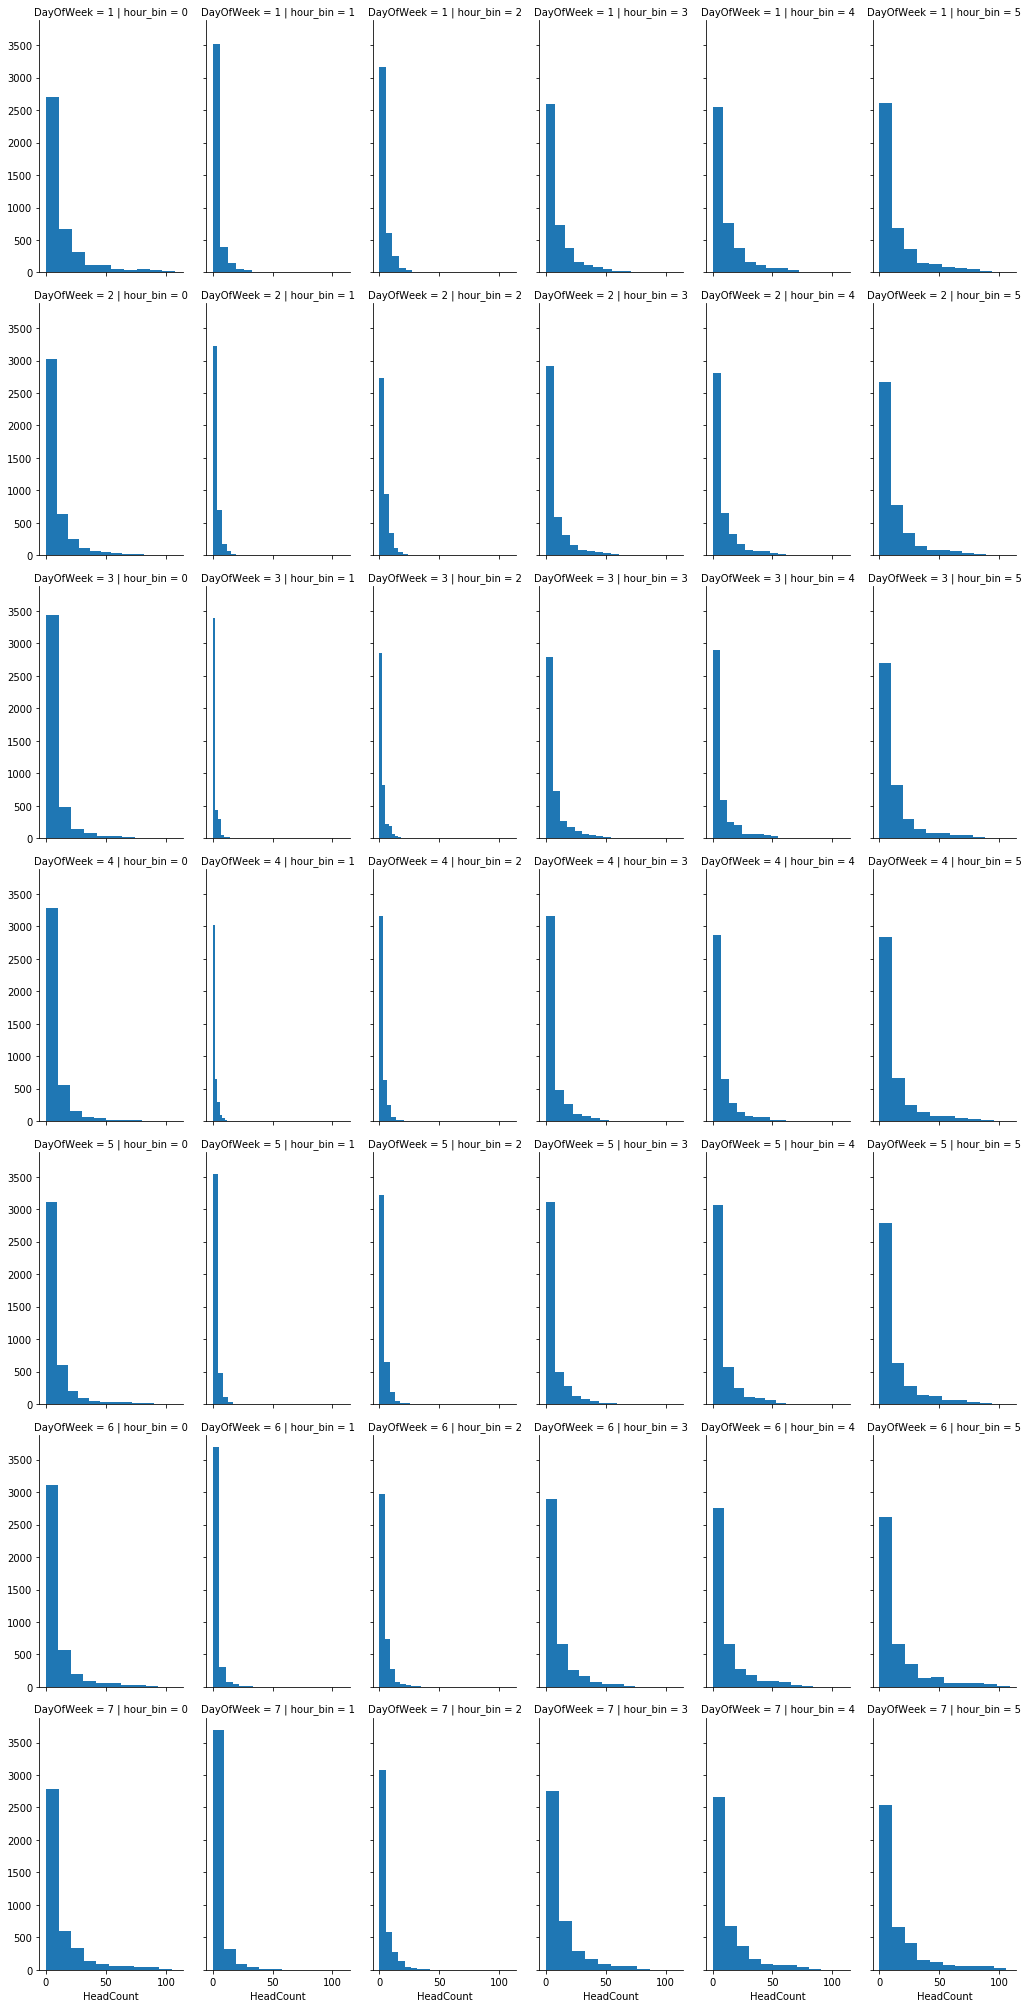

In [51]:
gr = sns.FacetGrid(headcount_df, col="hour_bin",row = 'DayOfWeek', height=4, aspect=0.6)
gr = gr.map(plt.hist, "HeadCount")

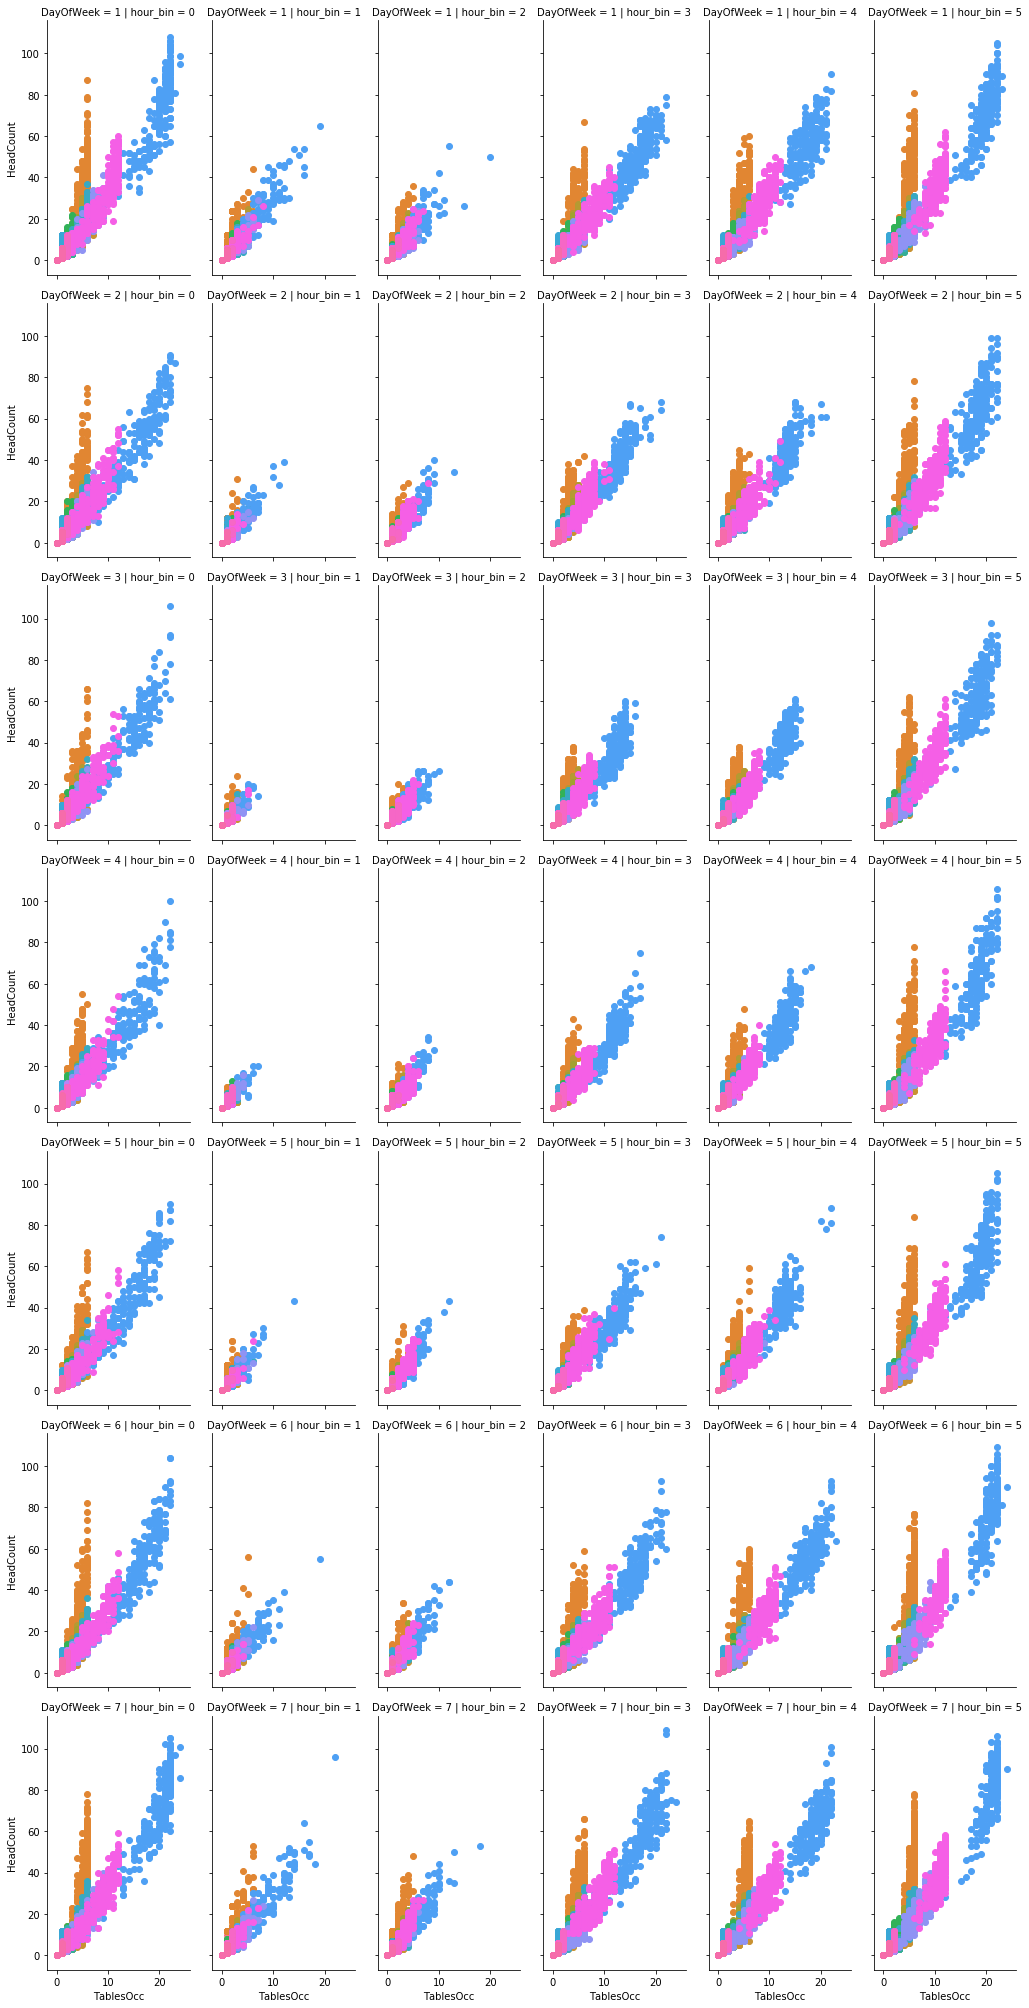

In [53]:
gr = sns.FacetGrid(headcount_df, 
                   col="hour_bin",
                   row = 'DayOfWeek', 
                   hue = 'GameCode',
                   height=4, 
                   aspect=0.6)
gr = gr.map(plt.scatter, "TablesOcc","HeadCount")

In [95]:
y = headcount_df.groupby('GameCode')['HeadCount'].sum().reset_index().sort_values('HeadCount', ascending = False)

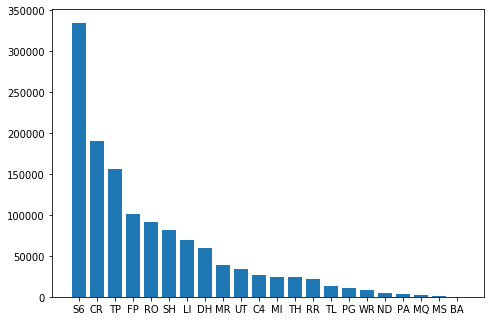

In [96]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(y['GameCode'],y['HeadCount'])
plt.show()

In [100]:
x = pd.crosstab(headcount_df['hour_bin'], headcount_df['GameCode'], values=headcount_df['HeadCount'], aggfunc='sum', normalize=True)

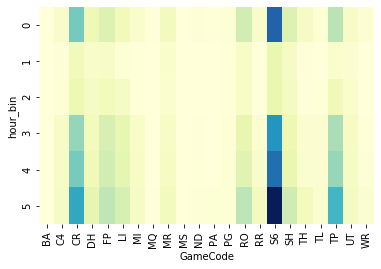

In [102]:
sns.heatmap(x,cmap="YlGnBu", annot=False, cbar=False)

In [105]:
y = pd.crosstab(headcount_df['DayOfWeek'], headcount_df['GameCode'], values=headcount_df['HeadCount'], aggfunc='sum', normalize=True)

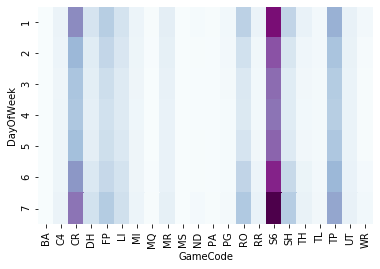

In [107]:
sns.heatmap(y,cmap="BuPu", annot=False, cbar=False)

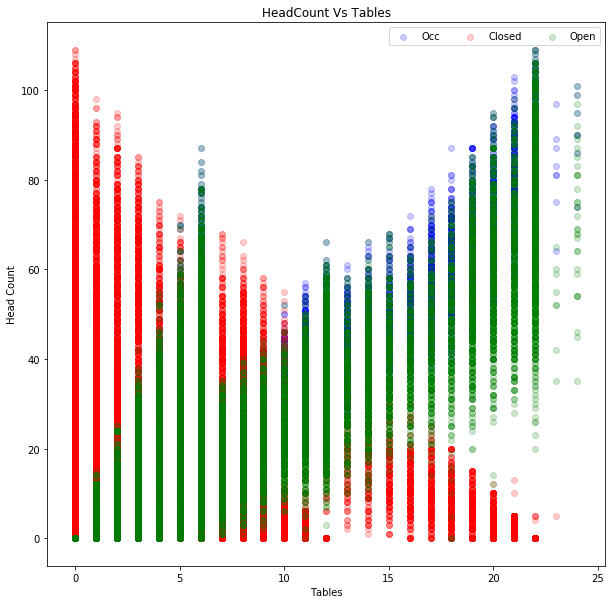

In [119]:
plt.figure(figsize=(10, 10))
a = plt.scatter(headcount_df['TablesOcc'], headcount_df['HeadCount'], alpha=0.2, c='Blue')
b = plt.scatter(headcount_df['TablesClosed'], headcount_df['HeadCount'], alpha=0.2, c='Red')
c = plt.scatter(headcount_df['TablesOpen'], headcount_df['HeadCount'], alpha=0.2, c='Green')
plt.legend((a, b, c),
           ('Occ', 'Closed', 'Open'),
           scatterpoints=1,
           loc='upper right',
           ncol=5,
           fontsize=10)
plt.xlabel('Tables')
plt.ylabel('Head Count')
plt.title('HeadCount Vs Tables')
plt.show()

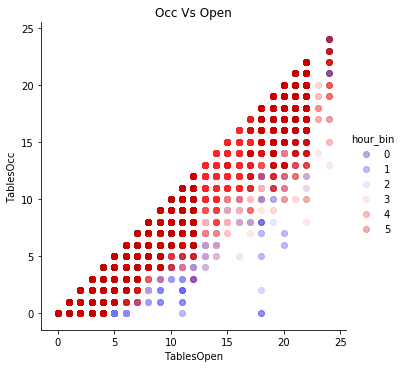

In [125]:
sns.lmplot(x = 'TablesOpen', y = 'TablesOcc', 
           data = headcount_df, 
           hue = "hour_bin", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('TablesOpen')
plt.ylabel('TablesOcc')
plt.title('Occ Vs Open')
plt.show()

In [155]:
grouped = headcount_df.groupby(headcount_df['GameCode'])
w = headcount_df['GameCode'].unique()
d = {}
for i in range(len(w)):
    d["group"+str(i)] = grouped.get_group(w[i])

['BA' 'C4' 'CR' 'DH' 'FP' 'LI' 'MI' 'MQ' 'MR' 'MS' 'ND' 'PA' 'PG' 'RO'
 'RR' 'S6' 'SH' 'TH' 'TL' 'TP' 'UT' 'WR']


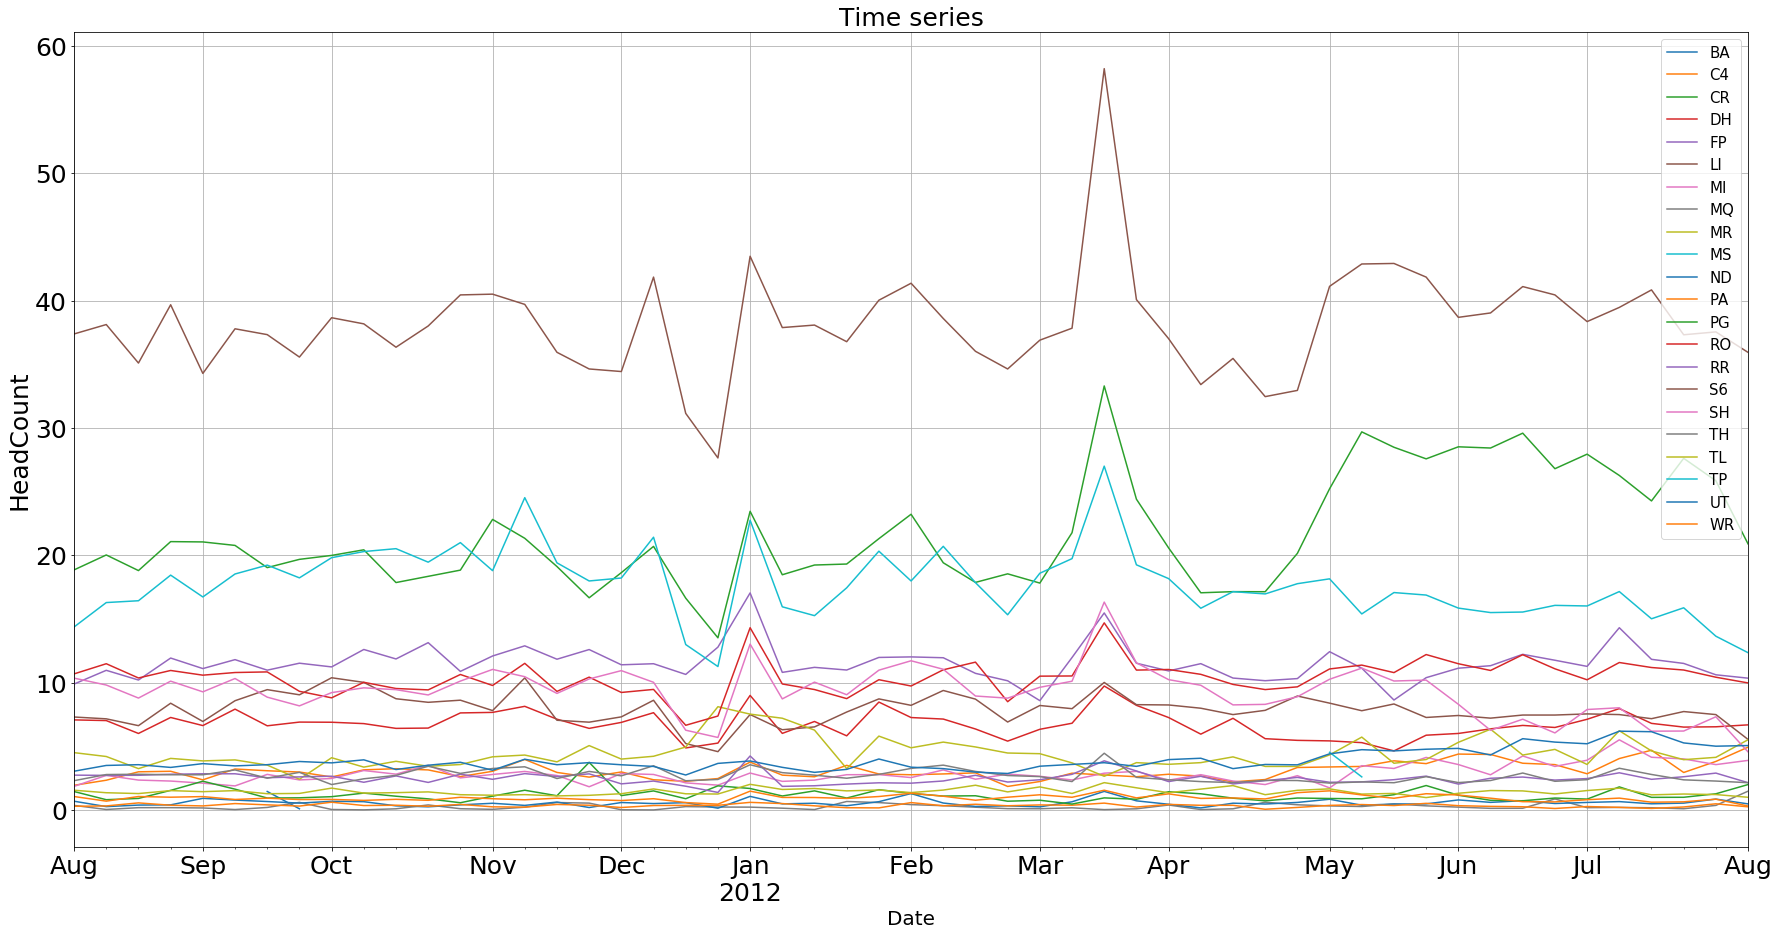

In [161]:
ax = plt.figure(figsize=(30, 15)).gca() # define axis
for i in range(len(w)):
    d["group"+str(i)]['HeadCount'].resample("1W").mean().plot(label= w[i], ax = ax)

ax.set_xlabel('Date',fontsize=20)
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
#ax.set_xticklabels(,rotation=0, fontsize=8)
ax.set_ylabel('HeadCount',fontsize=25)
ax.set_title('Time series',fontsize=25)
ax.legend(loc='upper right', fontsize=15);
ax.grid(True)
#group1['HeadCount'].resample("1W").mean().plot(ax = ax)